In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.preprocessing import scale
from sklearn.manifold import Isomap, TSNE
from sklearn.cluster import KMeans
import seaborn as sns
from utilities import *
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
qc = load_features_as_one(['data/QC/17545_AllFinished_Neurons.QC.txt'])
qc = qc.rename({"Percentage_lost(%)":"Percentage_unconnected(%)"}, axis='columns')
qc['Type'] = pd.Categorical(qc['Type'])


In [19]:
celltypes = pd.DataFrame(qc['Type'])
u_celltypes = sorted(list(set(celltypes['Type'])))

my_pal = sns.husl_palette(len(u_celltypes), s=.7)
lut = dict(zip(sorted(u_celltypes), my_pal))
celltype_colors = celltypes['Type'].map(lut)

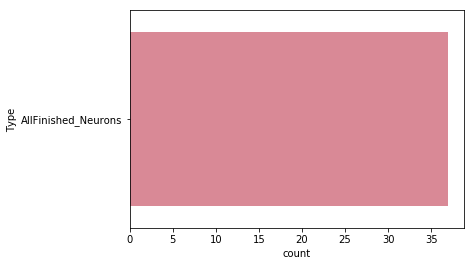

In [20]:
_ = sns.countplot(y="Type", palette=my_pal, data=qc)

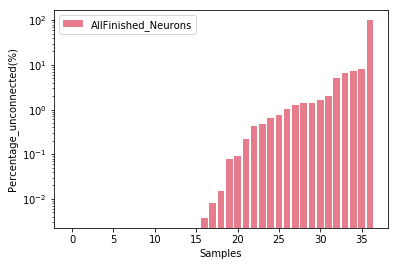

In [21]:
qc_sort = qc.sort_values('Percentage_unconnected(%)', ascending=True)
cur_x = 0
for tp in u_celltypes:
    qc_tp = qc_sort[qc_sort['Type']==tp]
    plt.bar(cur_x+np.arange(len(qc_tp)), qc_tp['Percentage_unconnected(%)'], color=lut[tp], label=tp)
    cur_x = cur_x+len(qc_tp)
plt.xlabel("Samples")
plt.ylabel("Percentage_unconnected(%)")
plt.yscale("log", nonposy='clip')
plt.legend()
plt.savefig('Figure/QC.Percentage_unconnected.pdf')

In [22]:
qc_sort.sort_values('Percentage_unconnected(%)', ascending=False).to_excel("data/QC/17545_QC.xlsx")